In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.ndimage import gaussian_filter1d

/Users/f004p74/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/f004p74/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/6t/xg1yxxr16v586fbc0kv1g05m0000gn/T/ipykernel_56041/3445371512.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://gith

In [2]:
path = "/Users/f004p74/Documents/dartmouth/projects/NNDb/movie_annotations/"
pathdir = os.listdir(path)
movie_list = [x for x in pathdir if '.' not in x]

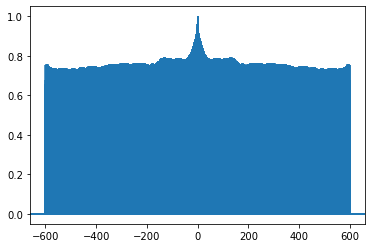

In [3]:
# CORRECTED LAGS

a1,a2,a3,a4,a5,a6,a7,a8,a9 = [],[],[],[],[],[],[],[],[]
lagtime = 100
long = 600

for movie in movie_list:

    df = pd.read_csv(path+movie+os.sep+movie+"_social.csv", dtype='float')
    
    ssx = plt.xcorr(df['speech'],df['speech'], maxlags=long)
    sbx = plt.xcorr(df['speech'],df['body'], maxlags=long)
    sfx = plt.xcorr(df['speech'],df['face'], maxlags=long)
    bsx = plt.xcorr(df['body'],df['speech'], maxlags=long)
    bbx = plt.xcorr(df['body'],df['body'], maxlags=long)
    bfx = plt.xcorr(df['body'],df['face'], maxlags=long)
    fsx = plt.xcorr(df['face'],df['speech'], maxlags=long)
    fbx = plt.xcorr(df['face'],df['body'], maxlags=long)
    ffx = plt.xcorr(df['face'],df['face'], maxlags=long)

    ss = plt.xcorr(df['speech'],df['speech'], maxlags=lagtime)
    sb = plt.xcorr(df['speech'],df['body'], maxlags=lagtime)
    sf = plt.xcorr(df['speech'],df['face'], maxlags=lagtime)
    bs = plt.xcorr(df['body'],df['speech'], maxlags=lagtime)
    bb = plt.xcorr(df['body'],df['body'], maxlags=lagtime)
    bf = plt.xcorr(df['body'],df['face'], maxlags=lagtime)
    fs = plt.xcorr(df['face'],df['speech'], maxlags=lagtime)
    fb = plt.xcorr(df['face'],df['body'], maxlags=lagtime)
    ff = plt.xcorr(df['face'],df['face'], maxlags=lagtime)
    
    a1.append(ss[1]-ssx[1][0])
    a2.append(sb[1]-sbx[1][0])
    a3.append(sf[1]-sfx[1][0])
    a4.append(bs[1]-bsx[1][0])
    a5.append(bb[1]-bbx[1][0])
    a6.append(bf[1]-bfx[1][0])
    a7.append(fs[1]-fsx[1][0])
    a8.append(fb[1]-fbx[1][0])
    a9.append(ff[1]-ffx[1][0])

a1,a2,a3 = np.array(a1),np.array(a2),np.array(a3)
a4,a5,a6 = np.array(a4),np.array(a5),np.array(a6)
a7,a8,a9 = np.array(a7), np.array(a8),np.array(a9)

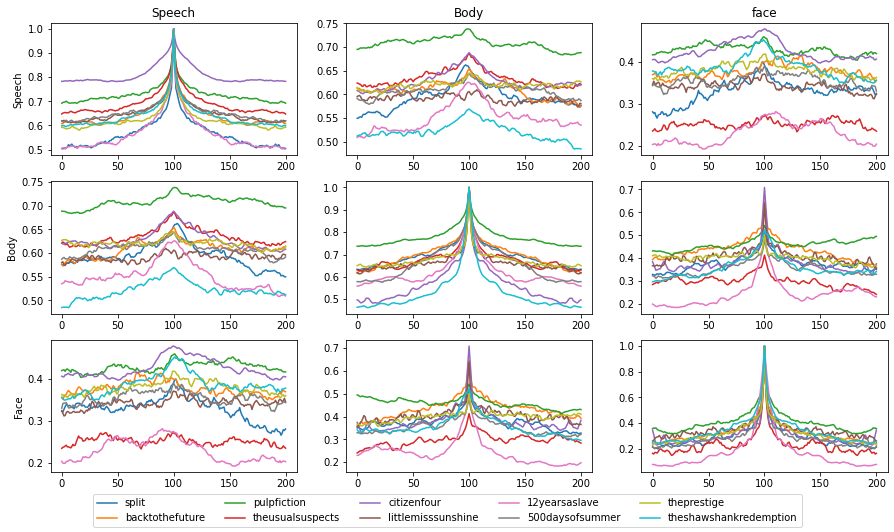

In [105]:
fig, ax = plt.subplots(3,3, figsize=(15,8))
fig.subplots_adjust(bottom=0.1)


for i in range(0, 10):
    ax1 = ax[0,0]
    ax1.plot(np.array(a1[i]))
    ax1.set_title("Speech")
    ax1.set_ylabel("Speech")
    
    ax2 = ax[0,1]
    ax2.plot(np.array(a2[i]))
    ax2.set_title("Body")

    ax3 = ax[0,2]
    ax3.plot(np.array(a3[i]))
    ax3.set_title("face")
    
    ax4 = ax[1,0]
    ax4.plot(np.array(a4[i]))
    ax4.set_ylabel("Body")

    ax5 = ax[1,1]
    ax5.plot(np.array(a5[i]))

    ax6 = ax[1,2]
    ax6.plot(np.array(a6[i]))

    ax7 = ax[2,0]
    ax7.plot(np.array(a7[i]))
    ax7.set_ylabel("Face")

    ax8 = ax[2,1]
    ax8.plot(np.array(a8[i]))

    ax9 = ax[2,2]
    ax9.plot(np.array(a9[i]))
    
fig.legend(labels=movie_list, loc="lower center", ncol=5)


In [4]:
# Average all of the arrays across their midpoints
def midpoint_avg(arr):
    total = arr.shape[1] - 1
    midpoint = int(total/2)
    forward = arr[:midpoint]
    flipped = np.flip(forward)
    arr = np.array([forward, flipped])
    symmetric = arr.mean(axis=0)
    return symmetric

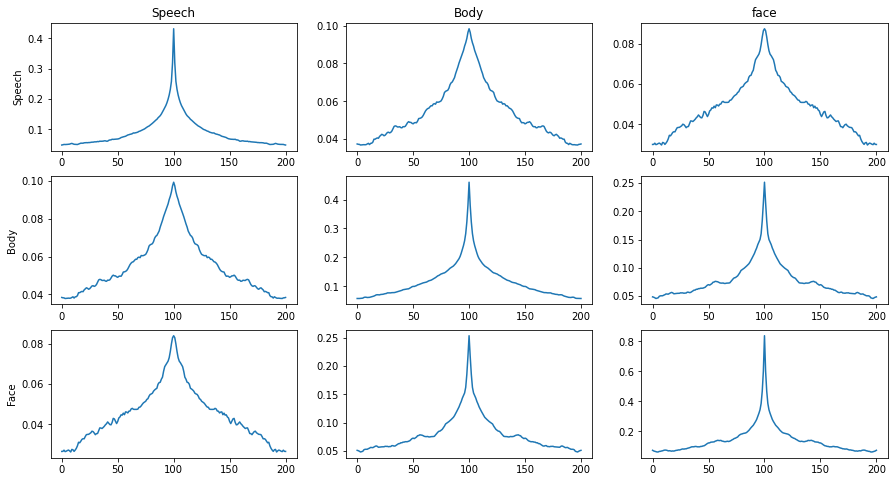

In [5]:
fig, ax = plt.subplots(3,3, figsize=(15,8))

ax1 = ax[0,0]
ax1.plot(midpoint_avg(a1).mean(axis=0))
ax1.set_title("Speech")
ax1.set_ylabel("Speech")

ax2 = ax[0,1]
ax2.plot(midpoint_avg(a2).mean(axis=0))
ax2.set_title("Body")

ax3 = ax[0,2]
ax3.plot(midpoint_avg(a3).mean(axis=0))
ax3.set_title("face")

ax4 = ax[1,0]
ax4.plot(midpoint_avg(a4).mean(axis=0))
ax4.set_ylabel("Body")

ax5 = ax[1,1]
ax5.plot(midpoint_avg(a5).mean(axis=0))

ax6 = ax[1,2]
ax6.plot(midpoint_avg(a6).mean(axis=0))

ax7 = ax[2,0]
ax7.plot(midpoint_avg(a7).mean(axis=0))
ax7.set_ylabel("Face")

ax8 = ax[2,1]
ax8.plot(midpoint_avg(a8).mean(axis=0))

ax9 = ax[2,2]
ax9.plot(midpoint_avg(a9).mean(axis=0))

plt.show()

In [6]:
a1m = midpoint_avg(a1).mean(axis=0)
a2m = midpoint_avg(a2).mean(axis=0)
a3m = midpoint_avg(a3).mean(axis=0)
a4m = midpoint_avg(a4).mean(axis=0)
a5m = midpoint_avg(a5).mean(axis=0)
a6m = midpoint_avg(a6).mean(axis=0)
a7m = midpoint_avg(a7).mean(axis=0)
a8m = midpoint_avg(a8).mean(axis=0)
a9m = midpoint_avg(a9).mean(axis=0)

In [7]:
# Take the mean for each row:

def row_avgs (arr1, arr2, arr3):
    row_list = [arr1, arr2, arr3]
    row = np.array(row_list).mean(axis=0)
    
    return row

row1 = row_avgs(a1m,a2m,a3m)
row2 = row_avgs(a4m,a5m,a6m)
row3 = row_avgs(a7m,a8m,a9m)

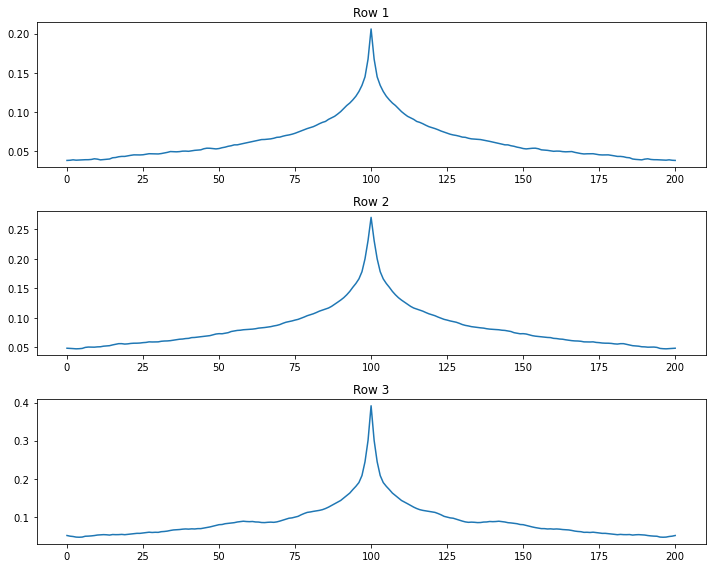

In [8]:
fig, ax = plt.subplots(3, figsize= (10,8))

ax1 = ax[0]
ax1.plot(row1)
ax1.set_title("Row 1")
#ax1.set_ylim([0,1])

ax2 = ax[1]
ax2.plot(row2)
ax2.set_title("Row 2")

ax3 = ax[2]
ax3.plot(row3)
ax3.set_title("Row 3")

plt.tight_layout()
plt.show()

In [9]:
speech_lag = 100 - np.min(np.where(row1 > row1.max()/2))
body_lag = 100 - np.min(np.where(row2 > row2.max()/2))
face_lag = 100 - np.min(np.where(row3 > row3.max()/2))

def smooth_socials (speech, body, face):
    
    x = np.sqrt(2*np.log(2))
    
    smooth_speech = sp.ndimage.gaussian_filter1d(speech, speech_lag/x)
    smooth_body = sp.ndimage.gaussian_filter1d(body, body_lag/x)
    smooth_face = sp.ndimage.gaussian_filter1d(face, face_lag/x)
    
    smooth_speech_z = sp.stats.zscore(smooth_speech)
    smooth_body_z = sp.stats.zscore(smooth_body)
    smooth_face_z = sp.stats.zscore(smooth_face)
    
    smooth_list = [smooth_speech_z, smooth_body_z, smooth_face_z]
    smooth_array = np.array(smooth_list)
    
    return smooth_array.mean(axis=0)

def z_socials (speech, body, face):
    speech_z = sp.stats.zscore(speech)
    body_z = sp.stats.zscore(body)
    face_z = sp.stats.zscore(face)
    
    z_list = [speech_z, body_z, face_z]
    z_array = np.array(z_list)
    
    return z_array.mean(axis=0)

theprestige


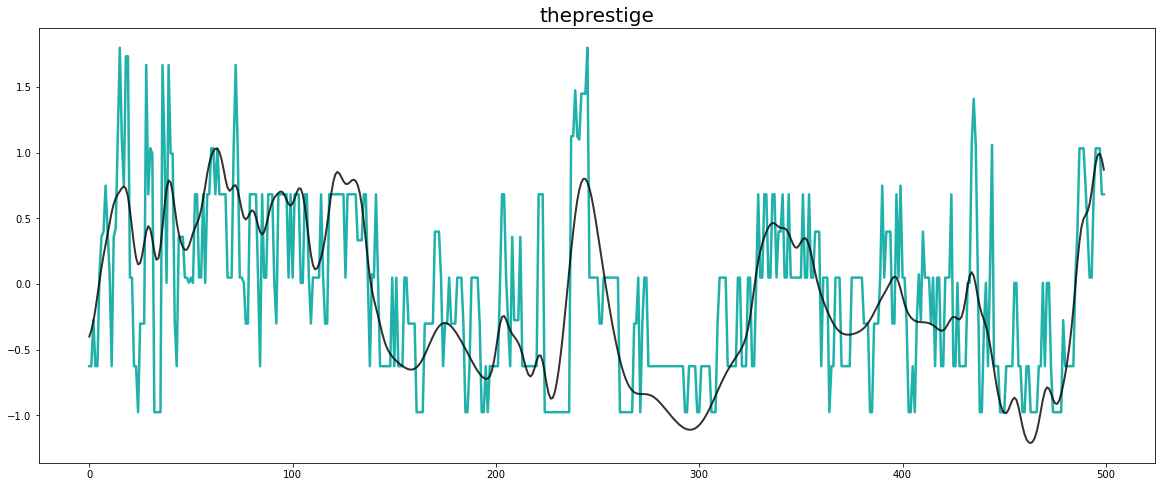

In [10]:
movie_list.sort()
for movie in movie_list[7:8]:
    print(movie)

    df = pd.read_csv(path+movie+os.sep+movie+"_social.csv", dtype='float')
    
    smoothed = smooth_socials(df['speech'],df['body'],df['face'])
    unsmoothed = z_socials(df['speech'],df['body'],df['face'])
    
    fig, ax = plt.subplots(figsize=(20,8))

    plt.plot(unsmoothed[300:800],color='lightseagreen', linewidth=2.5)
    plt.plot(smoothed[300:800],color='black', linewidth=2, alpha=0.8)

    plt.title(movie, fontsize=20)
    
    

# Calculating Run Lengths 

In [11]:
'''
Function written by https://github.com/alimanfoo
'''

def find_runs(x):
    """Find runs of consecutive items in an array."""

    # ensure array
    x = np.asanyarray(x)
    if x.ndim != 1:
        raise ValueError('only 1D array supported')
    n = x.shape[0]

    # handle empty array
    if n == 0:
        return np.array([]), np.array([]), np.array([])

    else:
        # find run starts
        loc_run_start = np.empty(n, dtype=bool)
        loc_run_start[0] = True
        np.not_equal(x[:-1], x[1:], out=loc_run_start[1:])
        run_starts = np.nonzero(loc_run_start)[0]

        # find run values
        run_values = x[loc_run_start]

        # find run lengths
        run_lengths = np.diff(np.append(run_starts, n))

        return run_values, run_starts, run_lengths

In [12]:
# Binarizing the smoothed timeseries 

movie_medians = []
movie_percentages = []

for movie in movie_list:
    df = pd.read_csv(path+movie+os.sep+movie+"_social.csv", dtype='float')
    
    smoothed = smooth_socials(df['speech'],df['body'],df['face'])
    
    medians = []
    percentages = []

    for threshold in np.arange(-1, 10, 0.1):

        binarized_list = smoothed > threshold # use 0.1
        percentages.append(np.mean(binarized_list)*100)
        run_values, run_starts, run_lengths = find_runs(binarized_list)
        ones = [x for i,x in enumerate(run_lengths) if run_values[i]]
        medians.append(np.median(ones))
        
    movie_medians.append(medians)
    movie_percentages.append(percentages)


/Users/f004p74/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/f004p74/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/f004p74/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/f004p74/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/f004p74/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/f004p74/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in s

In [13]:
medians_arr = np.array(movie_medians)
percentages_arr = np.array(movie_percentages)

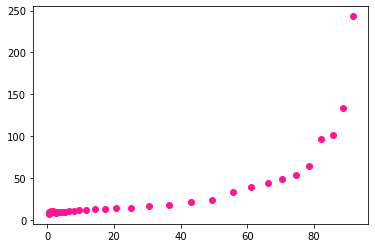

In [14]:
plt.scatter(percentages_arr.mean(axis=0),medians_arr.mean(axis=0), color='deeppink')

# plt.ylim(0,100)
# plt.xlim(0,105)

## Generating movie clips for annotation

In [16]:
import moviepy.editor as me 
from moviepy.editor import *

In [17]:
for movie in movie_list[1:]:
    
    print("starting with: ", movie)
    
    video_path = "/Users/f004p74/Documents/dartmouth/projects/NNDb/movies/"
    df = pd.read_csv(path+movie+os.sep+movie+"_social.csv", dtype='float')
    
    smoothed = smooth_socials(df['speech'],df['body'],df['face'])

    binarized_list = smoothed > 0.1
    run_values, run_starts, run_lengths = find_runs(binarized_list)
    
    # create clips
    movie_clip = me.VideoFileClip(video_path+movie+".mp4")
    
    starts, stops = [], []
    for ix, length in enumerate(run_lengths):
        if length < 25 and length > 15:
            x = run_starts[ix]
            starts.append(x)
            stops.append(x + length)
            
        else:
            continue
    
    
    for ix, start in enumerate(starts):
        
        print(start, stops[ix])
        clip = movie_clip.subclip(start,stops[ix])
        
        clip.write_videofile(movie+"_"+str(start)+"_"+str(stops[ix])+".mp4",
                        codec='libx264', 
                        audio_codec='aac', 
                        temp_audiofile='temp-audio.m4a', 
                        remove_temp=True)
    
    print("finished writing ", len(starts), "clips. \n Beginning next movie ... ")


starting with:  500daysofsummer
272 295
Moviepy - Building video 500daysofsummer_272_295.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_272_295.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_272_295.mp4
546 563
Moviepy - Building video 500daysofsummer_546_563.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_546_563.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_546_563.mp4
916 938
Moviepy - Building video 500daysofsummer_916_938.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_916_938.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_916_938.mp4
938 959
Moviepy - Building video 500daysofsummer_938_959.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_938_959.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_938_959.mp4
959 978
Moviepy - Building video 500daysofsummer_959_978.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_959_978.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_959_978.mp4
1195 1217
Moviepy - Building video 500daysofsummer_1195_1217.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_1195_1217.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_1195_1217.mp4
1333 1349
Moviepy - Building video 500daysofsummer_1333_1349.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_1333_1349.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_1333_1349.mp4
1349 1368
Moviepy - Building video 500daysofsummer_1349_1368.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_1349_1368.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_1349_1368.mp4
1491 1508
Moviepy - Building video 500daysofsummer_1491_1508.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_1491_1508.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_1491_1508.mp4
1513 1531
Moviepy - Building video 500daysofsummer_1513_1531.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_1513_1531.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_1513_1531.mp4
1964 1986
Moviepy - Building video 500daysofsummer_1964_1986.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_1964_1986.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_1964_1986.mp4
2069 2093
Moviepy - Building video 500daysofsummer_2069_2093.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_2069_2093.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_2069_2093.mp4
3006 3025
Moviepy - Building video 500daysofsummer_3006_3025.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_3006_3025.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_3006_3025.mp4
3025 3042
Moviepy - Building video 500daysofsummer_3025_3042.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_3025_3042.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_3025_3042.mp4
3063 3084
Moviepy - Building video 500daysofsummer_3063_3084.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_3063_3084.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_3063_3084.mp4
3185 3202
Moviepy - Building video 500daysofsummer_3185_3202.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_3185_3202.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_3185_3202.mp4
3497 3517
Moviepy - Building video 500daysofsummer_3497_3517.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_3497_3517.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_3497_3517.mp4
3823 3847
Moviepy - Building video 500daysofsummer_3823_3847.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_3823_3847.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_3823_3847.mp4
3856 3878
Moviepy - Building video 500daysofsummer_3856_3878.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_3856_3878.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_3856_3878.mp4
4435 4454
Moviepy - Building video 500daysofsummer_4435_4454.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_4435_4454.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_4435_4454.mp4
4454 4472
Moviepy - Building video 500daysofsummer_4454_4472.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_4454_4472.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_4454_4472.mp4
4472 4488
Moviepy - Building video 500daysofsummer_4472_4488.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_4472_4488.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_4472_4488.mp4
4845 4864
Moviepy - Building video 500daysofsummer_4845_4864.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_4845_4864.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_4845_4864.mp4
4950 4966
Moviepy - Building video 500daysofsummer_4950_4966.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_4950_4966.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_4950_4966.mp4
5139 5160
Moviepy - Building video 500daysofsummer_5139_5160.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video 500daysofsummer_5139_5160.mp4



Moviepy - Done !
Moviepy - video ready 500daysofsummer_5139_5160.mp4
finished writing  25 clips. 
 Beginning next movie ... 
starting with:  backtothefuture
107 124
Moviepy - Building video backtothefuture_107_124.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_107_124.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_107_124.mp4
290 310
Moviepy - Building video backtothefuture_290_310.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_290_310.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_290_310.mp4
310 331
Moviepy - Building video backtothefuture_310_331.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_310_331.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_310_331.mp4
1120 1141
Moviepy - Building video backtothefuture_1120_1141.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_1120_1141.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_1120_1141.mp4
1451 1469
Moviepy - Building video backtothefuture_1451_1469.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_1451_1469.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_1451_1469.mp4
1521 1537
Moviepy - Building video backtothefuture_1521_1537.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_1521_1537.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_1521_1537.mp4
1617 1634
Moviepy - Building video backtothefuture_1617_1634.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_1617_1634.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_1617_1634.mp4
2052 2074
Moviepy - Building video backtothefuture_2052_2074.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_2052_2074.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_2052_2074.mp4
2076 2095
Moviepy - Building video backtothefuture_2076_2095.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_2076_2095.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_2076_2095.mp4
2095 2116
Moviepy - Building video backtothefuture_2095_2116.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_2095_2116.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_2095_2116.mp4
2116 2135
Moviepy - Building video backtothefuture_2116_2135.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_2116_2135.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_2116_2135.mp4
2135 2159
Moviepy - Building video backtothefuture_2135_2159.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_2135_2159.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_2135_2159.mp4
2510 2527
Moviepy - Building video backtothefuture_2510_2527.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_2510_2527.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_2510_2527.mp4
3932 3948
Moviepy - Building video backtothefuture_3932_3948.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_3932_3948.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_3932_3948.mp4
4292 4309
Moviepy - Building video backtothefuture_4292_4309.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4292_4309.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4292_4309.mp4
4510 4531
Moviepy - Building video backtothefuture_4510_4531.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4510_4531.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4510_4531.mp4
4579 4598
Moviepy - Building video backtothefuture_4579_4598.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4579_4598.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4579_4598.mp4
4598 4617
Moviepy - Building video backtothefuture_4598_4617.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4598_4617.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4598_4617.mp4
4748 4766
Moviepy - Building video backtothefuture_4748_4766.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4748_4766.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4748_4766.mp4
4829 4850
Moviepy - Building video backtothefuture_4829_4850.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4829_4850.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4829_4850.mp4
4958 4982
Moviepy - Building video backtothefuture_4958_4982.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4958_4982.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4958_4982.mp4
4987 5007
Moviepy - Building video backtothefuture_4987_5007.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_4987_5007.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_4987_5007.mp4
5009 5027
Moviepy - Building video backtothefuture_5009_5027.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_5009_5027.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_5009_5027.mp4
5276 5295
Moviepy - Building video backtothefuture_5276_5295.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_5276_5295.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_5276_5295.mp4
5295 5318
Moviepy - Building video backtothefuture_5295_5318.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video backtothefuture_5295_5318.mp4



Moviepy - Done !
Moviepy - video ready backtothefuture_5295_5318.mp4
finished writing  25 clips. 
 Beginning next movie ... 
starting with:  citizenfour
186 205
Moviepy - Building video citizenfour_186_205.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_186_205.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_186_205.mp4
1797 1820
Moviepy - Building video citizenfour_1797_1820.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_1797_1820.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_1797_1820.mp4
1820 1844
Moviepy - Building video citizenfour_1820_1844.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_1820_1844.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_1820_1844.mp4
2229 2245
Moviepy - Building video citizenfour_2229_2245.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_2229_2245.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_2229_2245.mp4
2284 2300
Moviepy - Building video citizenfour_2284_2300.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_2284_2300.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_2284_2300.mp4
2338 2360
Moviepy - Building video citizenfour_2338_2360.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_2338_2360.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_2338_2360.mp4
2373 2390
Moviepy - Building video citizenfour_2373_2390.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_2373_2390.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_2373_2390.mp4
2541 2561
Moviepy - Building video citizenfour_2541_2561.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_2541_2561.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_2541_2561.mp4
2726 2743
Moviepy - Building video citizenfour_2726_2743.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_2726_2743.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_2726_2743.mp4
3495 3515
Moviepy - Building video citizenfour_3495_3515.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_3495_3515.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_3495_3515.mp4
3735 3754
Moviepy - Building video citizenfour_3735_3754.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_3735_3754.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_3735_3754.mp4
4207 4227
Moviepy - Building video citizenfour_4207_4227.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_4207_4227.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_4207_4227.mp4
4383 4400
Moviepy - Building video citizenfour_4383_4400.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_4383_4400.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_4383_4400.mp4
5664 5681
Moviepy - Building video citizenfour_5664_5681.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_5664_5681.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_5664_5681.mp4
5724 5743
Moviepy - Building video citizenfour_5724_5743.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video citizenfour_5724_5743.mp4



Moviepy - Done !
Moviepy - video ready citizenfour_5724_5743.mp4
finished writing  15 clips. 
 Beginning next movie ... 
starting with:  littlemisssunshine
65 88
Moviepy - Building video littlemisssunshine_65_88.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_65_88.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_65_88.mp4
581 602
Moviepy - Building video littlemisssunshine_581_602.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_581_602.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_581_602.mp4
1030 1052
Moviepy - Building video littlemisssunshine_1030_1052.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_1030_1052.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_1030_1052.mp4
1052 1070
Moviepy - Building video littlemisssunshine_1052_1070.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_1052_1070.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_1052_1070.mp4
2033 2057
Moviepy - Building video littlemisssunshine_2033_2057.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_2033_2057.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_2033_2057.mp4
2244 2261
Moviepy - Building video littlemisssunshine_2244_2261.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_2244_2261.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_2244_2261.mp4
2601 2620
Moviepy - Building video littlemisssunshine_2601_2620.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_2601_2620.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_2601_2620.mp4
3314 3332
Moviepy - Building video littlemisssunshine_3314_3332.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_3314_3332.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_3314_3332.mp4
3870 3891
Moviepy - Building video littlemisssunshine_3870_3891.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_3870_3891.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_3870_3891.mp4
4481 4504
Moviepy - Building video littlemisssunshine_4481_4504.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_4481_4504.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_4481_4504.mp4
4562 4586
Moviepy - Building video littlemisssunshine_4562_4586.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_4562_4586.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_4562_4586.mp4
4586 4609
Moviepy - Building video littlemisssunshine_4586_4609.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_4586_4609.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_4586_4609.mp4
4791 4810
Moviepy - Building video littlemisssunshine_4791_4810.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_4791_4810.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_4791_4810.mp4
4919 4937
Moviepy - Building video littlemisssunshine_4919_4937.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_4919_4937.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_4919_4937.mp4
4937 4956
Moviepy - Building video littlemisssunshine_4937_4956.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_4937_4956.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_4937_4956.mp4
4989 5013
Moviepy - Building video littlemisssunshine_4989_5013.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_4989_5013.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_4989_5013.mp4
5150 5171
Moviepy - Building video littlemisssunshine_5150_5171.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_5150_5171.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_5150_5171.mp4
5298 5314
Moviepy - Building video littlemisssunshine_5298_5314.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_5298_5314.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_5298_5314.mp4
5371 5394
Moviepy - Building video littlemisssunshine_5371_5394.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_5371_5394.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_5371_5394.mp4
5417 5439
Moviepy - Building video littlemisssunshine_5417_5439.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video littlemisssunshine_5417_5439.mp4



Moviepy - Done !
Moviepy - video ready littlemisssunshine_5417_5439.mp4
finished writing  20 clips. 
 Beginning next movie ... 
starting with:  pulpfiction
156 172
Moviepy - Building video pulpfiction_156_172.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_156_172.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_156_172.mp4
484 507
Moviepy - Building video pulpfiction_484_507.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_484_507.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_484_507.mp4
576 594
Moviepy - Building video pulpfiction_576_594.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_576_594.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_576_594.mp4
716 740
Moviepy - Building video pulpfiction_716_740.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_716_740.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_716_740.mp4
778 796
Moviepy - Building video pulpfiction_778_796.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_778_796.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_778_796.mp4
796 816
Moviepy - Building video pulpfiction_796_816.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_796_816.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_796_816.mp4
1432 1453
Moviepy - Building video pulpfiction_1432_1453.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_1432_1453.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_1432_1453.mp4
1508 1524
Moviepy - Building video pulpfiction_1508_1524.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_1508_1524.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_1508_1524.mp4
1553 1573
Moviepy - Building video pulpfiction_1553_1573.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_1553_1573.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_1553_1573.mp4
1968 1984
Moviepy - Building video pulpfiction_1968_1984.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_1968_1984.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_1968_1984.mp4
1984 2006
Moviepy - Building video pulpfiction_1984_2006.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_1984_2006.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_1984_2006.mp4
2467 2487
Moviepy - Building video pulpfiction_2467_2487.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_2467_2487.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_2467_2487.mp4
2828 2844
Moviepy - Building video pulpfiction_2828_2844.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_2828_2844.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_2828_2844.mp4
3072 3093
Moviepy - Building video pulpfiction_3072_3093.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_3072_3093.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_3072_3093.mp4
3284 3301
Moviepy - Building video pulpfiction_3284_3301.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_3284_3301.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_3284_3301.mp4
3472 3491
Moviepy - Building video pulpfiction_3472_3491.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_3472_3491.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_3472_3491.mp4
3519 3542
Moviepy - Building video pulpfiction_3519_3542.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_3519_3542.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_3519_3542.mp4
4846 4867
Moviepy - Building video pulpfiction_4846_4867.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_4846_4867.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_4846_4867.mp4
4982 5001
Moviepy - Building video pulpfiction_4982_5001.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_4982_5001.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_4982_5001.mp4
5471 5491
Moviepy - Building video pulpfiction_5471_5491.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_5471_5491.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_5471_5491.mp4
6449 6470
Moviepy - Building video pulpfiction_6449_6470.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6449_6470.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6449_6470.mp4
6470 6489
Moviepy - Building video pulpfiction_6470_6489.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6470_6489.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6470_6489.mp4
6604 6628
Moviepy - Building video pulpfiction_6604_6628.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6604_6628.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6604_6628.mp4
6636 6660
Moviepy - Building video pulpfiction_6636_6660.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6636_6660.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6636_6660.mp4
6725 6747
Moviepy - Building video pulpfiction_6725_6747.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6725_6747.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6725_6747.mp4
6836 6854
Moviepy - Building video pulpfiction_6836_6854.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6836_6854.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6836_6854.mp4
6867 6886
Moviepy - Building video pulpfiction_6867_6886.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6867_6886.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6867_6886.mp4
6908 6926
Moviepy - Building video pulpfiction_6908_6926.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_6908_6926.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_6908_6926.mp4
7860 7883
Moviepy - Building video pulpfiction_7860_7883.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_7860_7883.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_7860_7883.mp4
7942 7961
Moviepy - Building video pulpfiction_7942_7961.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video pulpfiction_7942_7961.mp4



Moviepy - Done !
Moviepy - video ready pulpfiction_7942_7961.mp4
finished writing  30 clips. 
 Beginning next movie ... 
starting with:  split
423 440
Moviepy - Building video split_423_440.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_423_440.mp4



Moviepy - Done !
Moviepy - video ready split_423_440.mp4
440 456
Moviepy - Building video split_440_456.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_440_456.mp4



Moviepy - Done !
Moviepy - video ready split_440_456.mp4
509 532
Moviepy - Building video split_509_532.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_509_532.mp4



Moviepy - Done !
Moviepy - video ready split_509_532.mp4
832 854
Moviepy - Building video split_832_854.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_832_854.mp4



Moviepy - Done !
Moviepy - video ready split_832_854.mp4
1528 1546
Moviepy - Building video split_1528_1546.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_1528_1546.mp4



Moviepy - Done !
Moviepy - video ready split_1528_1546.mp4
1604 1622
Moviepy - Building video split_1604_1622.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_1604_1622.mp4



Moviepy - Done !
Moviepy - video ready split_1604_1622.mp4
1622 1644
Moviepy - Building video split_1622_1644.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_1622_1644.mp4



Moviepy - Done !
Moviepy - video ready split_1622_1644.mp4
2036 2057
Moviepy - Building video split_2036_2057.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_2036_2057.mp4



Moviepy - Done !
Moviepy - video ready split_2036_2057.mp4
2416 2437
Moviepy - Building video split_2416_2437.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_2416_2437.mp4



Moviepy - Done !
Moviepy - video ready split_2416_2437.mp4
2468 2484
Moviepy - Building video split_2468_2484.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_2468_2484.mp4



Moviepy - Done !
Moviepy - video ready split_2468_2484.mp4
3729 3747
Moviepy - Building video split_3729_3747.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3729_3747.mp4



Moviepy - Done !
Moviepy - video ready split_3729_3747.mp4
3753 3776
Moviepy - Building video split_3753_3776.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3753_3776.mp4



Moviepy - Done !
Moviepy - video ready split_3753_3776.mp4
3776 3796
Moviepy - Building video split_3776_3796.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3776_3796.mp4



Moviepy - Done !
Moviepy - video ready split_3776_3796.mp4
3804 3827
Moviepy - Building video split_3804_3827.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3804_3827.mp4



Moviepy - Done !
Moviepy - video ready split_3804_3827.mp4
3895 3917
Moviepy - Building video split_3895_3917.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3895_3917.mp4



Moviepy - Done !
Moviepy - video ready split_3895_3917.mp4
3917 3935
Moviepy - Building video split_3917_3935.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3917_3935.mp4



Moviepy - Done !
Moviepy - video ready split_3917_3935.mp4
3946 3965
Moviepy - Building video split_3946_3965.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3946_3965.mp4



Moviepy - Done !
Moviepy - video ready split_3946_3965.mp4
3977 3995
Moviepy - Building video split_3977_3995.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_3977_3995.mp4



Moviepy - Done !
Moviepy - video ready split_3977_3995.mp4
4118 4136
Moviepy - Building video split_4118_4136.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_4118_4136.mp4



Moviepy - Done !
Moviepy - video ready split_4118_4136.mp4
4406 4426
Moviepy - Building video split_4406_4426.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_4406_4426.mp4



Moviepy - Done !
Moviepy - video ready split_4406_4426.mp4
4812 4831
Moviepy - Building video split_4812_4831.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_4812_4831.mp4



Moviepy - Done !
Moviepy - video ready split_4812_4831.mp4
5609 5633
Moviepy - Building video split_5609_5633.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_5609_5633.mp4



Moviepy - Done !
Moviepy - video ready split_5609_5633.mp4
6046 6065
Moviepy - Building video split_6046_6065.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video split_6046_6065.mp4



Moviepy - Done !
Moviepy - video ready split_6046_6065.mp4
finished writing  23 clips. 
 Beginning next movie ... 
starting with:  theprestige
537 553
Moviepy - Building video theprestige_537_553.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_537_553.mp4



Moviepy - Done !
Moviepy - video ready theprestige_537_553.mp4
968 989
Moviepy - Building video theprestige_968_989.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_968_989.mp4



Moviepy - Done !
Moviepy - video ready theprestige_968_989.mp4
1109 1132
Moviepy - Building video theprestige_1109_1132.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_1109_1132.mp4



Moviepy - Done !
Moviepy - video ready theprestige_1109_1132.mp4
1647 1663
Moviepy - Building video theprestige_1647_1663.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_1647_1663.mp4



Moviepy - Done !
Moviepy - video ready theprestige_1647_1663.mp4
1663 1681
Moviepy - Building video theprestige_1663_1681.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_1663_1681.mp4



Moviepy - Done !
Moviepy - video ready theprestige_1663_1681.mp4
1681 1704
Moviepy - Building video theprestige_1681_1704.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_1681_1704.mp4



Moviepy - Done !
Moviepy - video ready theprestige_1681_1704.mp4
2010 2031
Moviepy - Building video theprestige_2010_2031.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_2010_2031.mp4



Moviepy - Done !
Moviepy - video ready theprestige_2010_2031.mp4
2040 2060
Moviepy - Building video theprestige_2040_2060.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_2040_2060.mp4



Moviepy - Done !
Moviepy - video ready theprestige_2040_2060.mp4
3295 3317
Moviepy - Building video theprestige_3295_3317.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_3295_3317.mp4



Moviepy - Done !
Moviepy - video ready theprestige_3295_3317.mp4
3370 3390
Moviepy - Building video theprestige_3370_3390.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_3370_3390.mp4



Moviepy - Done !
Moviepy - video ready theprestige_3370_3390.mp4
3665 3685
Moviepy - Building video theprestige_3665_3685.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_3665_3685.mp4



Moviepy - Done !
Moviepy - video ready theprestige_3665_3685.mp4
3782 3802
Moviepy - Building video theprestige_3782_3802.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_3782_3802.mp4



Moviepy - Done !
Moviepy - video ready theprestige_3782_3802.mp4
3855 3872
Moviepy - Building video theprestige_3855_3872.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_3855_3872.mp4



Moviepy - Done !
Moviepy - video ready theprestige_3855_3872.mp4
4050 4069
Moviepy - Building video theprestige_4050_4069.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_4050_4069.mp4



Moviepy - Done !
Moviepy - video ready theprestige_4050_4069.mp4
4231 4252
Moviepy - Building video theprestige_4231_4252.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_4231_4252.mp4



Moviepy - Done !
Moviepy - video ready theprestige_4231_4252.mp4
4400 4416
Moviepy - Building video theprestige_4400_4416.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_4400_4416.mp4



Moviepy - Done !
Moviepy - video ready theprestige_4400_4416.mp4
4423 4441
Moviepy - Building video theprestige_4423_4441.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_4423_4441.mp4



Moviepy - Done !
Moviepy - video ready theprestige_4423_4441.mp4
4600 4624
Moviepy - Building video theprestige_4600_4624.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_4600_4624.mp4



Moviepy - Done !
Moviepy - video ready theprestige_4600_4624.mp4
4802 4819
Moviepy - Building video theprestige_4802_4819.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_4802_4819.mp4



Moviepy - Done !
Moviepy - video ready theprestige_4802_4819.mp4
5348 5371
Moviepy - Building video theprestige_5348_5371.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_5348_5371.mp4



Moviepy - Done !
Moviepy - video ready theprestige_5348_5371.mp4
5566 5583
Moviepy - Building video theprestige_5566_5583.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_5566_5583.mp4



Moviepy - Done !
Moviepy - video ready theprestige_5566_5583.mp4
5583 5600
Moviepy - Building video theprestige_5583_5600.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_5583_5600.mp4



Moviepy - Done !
Moviepy - video ready theprestige_5583_5600.mp4
5638 5660
Moviepy - Building video theprestige_5638_5660.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_5638_5660.mp4



Moviepy - Done !
Moviepy - video ready theprestige_5638_5660.mp4
5801 5817
Moviepy - Building video theprestige_5801_5817.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_5801_5817.mp4



Moviepy - Done !
Moviepy - video ready theprestige_5801_5817.mp4
5817 5838
Moviepy - Building video theprestige_5817_5838.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_5817_5838.mp4



Moviepy - Done !
Moviepy - video ready theprestige_5817_5838.mp4
5867 5889
Moviepy - Building video theprestige_5867_5889.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_5867_5889.mp4



Moviepy - Done !
Moviepy - video ready theprestige_5867_5889.mp4
6408 6428
Moviepy - Building video theprestige_6408_6428.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_6408_6428.mp4



Moviepy - Done !
Moviepy - video ready theprestige_6408_6428.mp4
6491 6510
Moviepy - Building video theprestige_6491_6510.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theprestige_6491_6510.mp4



Moviepy - Done !
Moviepy - video ready theprestige_6491_6510.mp4
finished writing  28 clips. 
 Beginning next movie ... 
starting with:  theshawshankredemption
174 192
Moviepy - Building video theshawshankredemption_174_192.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_174_192.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_174_192.mp4
306 329
Moviepy - Building video theshawshankredemption_306_329.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_306_329.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_306_329.mp4
329 350
Moviepy - Building video theshawshankredemption_329_350.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_329_350.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_329_350.mp4
350 368
Moviepy - Building video theshawshankredemption_350_368.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_350_368.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_350_368.mp4
613 635
Moviepy - Building video theshawshankredemption_613_635.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_613_635.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_613_635.mp4
709 725
Moviepy - Building video theshawshankredemption_709_725.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_709_725.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_709_725.mp4
841 865
Moviepy - Building video theshawshankredemption_841_865.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_841_865.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_841_865.mp4
1146 1163
Moviepy - Building video theshawshankredemption_1146_1163.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_1146_1163.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_1146_1163.mp4
1869 1885
Moviepy - Building video theshawshankredemption_1869_1885.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_1869_1885.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_1869_1885.mp4
2199 2216
Moviepy - Building video theshawshankredemption_2199_2216.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_2199_2216.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_2199_2216.mp4
2464 2487
Moviepy - Building video theshawshankredemption_2464_2487.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_2464_2487.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_2464_2487.mp4
2611 2631
Moviepy - Building video theshawshankredemption_2611_2631.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_2611_2631.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_2611_2631.mp4
2973 2994
Moviepy - Building video theshawshankredemption_2973_2994.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_2973_2994.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_2973_2994.mp4
3336 3356
Moviepy - Building video theshawshankredemption_3336_3356.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_3336_3356.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_3336_3356.mp4
3585 3604
Moviepy - Building video theshawshankredemption_3585_3604.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_3585_3604.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_3585_3604.mp4
3817 3834
Moviepy - Building video theshawshankredemption_3817_3834.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_3817_3834.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_3817_3834.mp4
3970 3991
Moviepy - Building video theshawshankredemption_3970_3991.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_3970_3991.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_3970_3991.mp4
4221 4242
Moviepy - Building video theshawshankredemption_4221_4242.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_4221_4242.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_4221_4242.mp4
4400 4422
Moviepy - Building video theshawshankredemption_4400_4422.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_4400_4422.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_4400_4422.mp4
4449 4466
Moviepy - Building video theshawshankredemption_4449_4466.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_4449_4466.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_4449_4466.mp4
4724 4743
Moviepy - Building video theshawshankredemption_4724_4743.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_4724_4743.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_4724_4743.mp4
4978 4999
Moviepy - Building video theshawshankredemption_4978_4999.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_4978_4999.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_4978_4999.mp4
5285 5306
Moviepy - Building video theshawshankredemption_5285_5306.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_5285_5306.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_5285_5306.mp4
6054 6077
Moviepy - Building video theshawshankredemption_6054_6077.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_6054_6077.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_6054_6077.mp4
6077 6095
Moviepy - Building video theshawshankredemption_6077_6095.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_6077_6095.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_6077_6095.mp4
6376 6398
Moviepy - Building video theshawshankredemption_6376_6398.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_6376_6398.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_6376_6398.mp4
6454 6476
Moviepy - Building video theshawshankredemption_6454_6476.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_6454_6476.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_6454_6476.mp4
6525 6541
Moviepy - Building video theshawshankredemption_6525_6541.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_6525_6541.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_6525_6541.mp4
6591 6610
Moviepy - Building video theshawshankredemption_6591_6610.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_6591_6610.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_6591_6610.mp4
7142 7158
Moviepy - Building video theshawshankredemption_7142_7158.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_7142_7158.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_7142_7158.mp4
7358 7379
Moviepy - Building video theshawshankredemption_7358_7379.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theshawshankredemption_7358_7379.mp4



Moviepy - Done !
Moviepy - video ready theshawshankredemption_7358_7379.mp4
finished writing  31 clips. 
 Beginning next movie ... 
starting with:  theusualsuspects
368 386
Moviepy - Building video theusualsuspects_368_386.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_368_386.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_368_386.mp4
1299 1321
Moviepy - Building video theusualsuspects_1299_1321.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_1299_1321.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_1299_1321.mp4
1911 1927
Moviepy - Building video theusualsuspects_1911_1927.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_1911_1927.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_1911_1927.mp4
2475 2495
Moviepy - Building video theusualsuspects_2475_2495.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_2475_2495.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_2475_2495.mp4
2626 2644
Moviepy - Building video theusualsuspects_2626_2644.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_2626_2644.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_2626_2644.mp4
2644 2660
Moviepy - Building video theusualsuspects_2644_2660.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_2644_2660.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_2644_2660.mp4
2690 2709
Moviepy - Building video theusualsuspects_2690_2709.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_2690_2709.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_2690_2709.mp4
3351 3368
Moviepy - Building video theusualsuspects_3351_3368.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_3351_3368.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_3351_3368.mp4
3540 3562
Moviepy - Building video theusualsuspects_3540_3562.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_3540_3562.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_3540_3562.mp4
3566 3588
Moviepy - Building video theusualsuspects_3566_3588.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_3566_3588.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_3566_3588.mp4
3742 3764
Moviepy - Building video theusualsuspects_3742_3764.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_3742_3764.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_3742_3764.mp4
3845 3869
Moviepy - Building video theusualsuspects_3845_3869.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_3845_3869.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_3845_3869.mp4
3869 3886
Moviepy - Building video theusualsuspects_3869_3886.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_3869_3886.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_3869_3886.mp4
5001 5018
Moviepy - Building video theusualsuspects_5001_5018.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_5001_5018.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_5001_5018.mp4
5384 5408
Moviepy - Building video theusualsuspects_5384_5408.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_5384_5408.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_5384_5408.mp4
5627 5646
Moviepy - Building video theusualsuspects_5627_5646.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_5627_5646.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_5627_5646.mp4
5653 5673
Moviepy - Building video theusualsuspects_5653_5673.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_5653_5673.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_5653_5673.mp4
5673 5689
Moviepy - Building video theusualsuspects_5673_5689.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video theusualsuspects_5673_5689.mp4



Moviepy - Done !
Moviepy - video ready theusualsuspects_5673_5689.mp4
finished writing  18 clips. 
 Beginning next movie ... 


# Get clip lengths

In [5]:
clip_path = "/Users/f004p74/Documents/dartmouth/projects/NNDb/movie_clips/"

In [27]:
clip_name = []
clip_dur = []

for i in movie_list:
    
    clipdir = os.listdir(clip_path+i+os.sep)
    clip_list = [x for x in clipdir if '.mp4' in x]
    
    for clip in clip_list:
        video = me.VideoFileClip(clip_path+i+os.sep+clip)
        duration = video.duration * 1000
        
        
        clip_name.append(clip)
        clip_dur.append(duration)
    
    

In [28]:
clip_durations = dict(zip(clip_name, clip_dur))

In [29]:
clip_durations

{'split_5609_5633.mp4': 24020.0,
 'split_3729_3747.mp4': 18020.0,
 'split_1622_1644.mp4': 22020.0,
 'split_4118_4136.mp4': 18020.0,
 'split_1528_1546.mp4': 18020.0,
 'split_832_854.mp4': 22020.0,
 'split_509_532.mp4': 23020.0,
 'split_4406_4426.mp4': 20020.0,
 'split_6046_6065.mp4': 19020.0,
 'split_2416_2437.mp4': 21020.0,
 'backtothefuture_1521_1537.mp4': 16020.0,
 'backtothefuture_4292_4309.mp4': 17020.0,
 'backtothefuture_5276_5295.mp4': 19020.0,
 'backtothefuture_2510_2527.mp4': 17020.0,
 'backtothefuture_290_310.mp4': 20020.0,
 'backtothefuture_4987_5007.mp4': 20020.0,
 'backtothefuture_4748_4766.mp4': 18020.0,
 'backtothefuture_4598_4617.mp4': 19020.0,
 'backtothefuture_3932_3948.mp4': 16020.0,
 'backtothefuture_1120_1141.mp4': 21020.0,
 'pulpfiction_7860_7883.mp4': 23020.0,
 'pulpfiction_6908_6926.mp4': 18020.0,
 'pulpfiction_6604_6628.mp4': 24020.0,
 'pulpfiction_6636_6660.mp4': 24020.0,
 'pulpfiction_1968_1984.mp4': 16020.0,
 'pulpfiction_3284_3301.mp4': 17020.0,
 'pulpfictio